In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import seaborn as sns

In [2]:
data = pd.read_csv('apps.csv')
data

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,NaN,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [4]:
data.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [5]:
#We fill Nan values in rating column with 0 value
data['Rating'].fillna(0, inplace=True)
data.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating               0
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [6]:
#Now we work on size column
data['Size'].unique()

array([ 19. ,  14. ,   8.7,  25. ,   2.8,   5.6,  29. ,  33. ,   3.1,
        28. ,  12. ,  20. ,  21. ,  37. ,   2.7,   5.5,  17. ,  39. ,
        31. ,   4.2,   7. ,  23. ,   6. ,   6.1,   4.6,   9.2,   5.2,
        11. ,  24. ,   nan,   9.4,  15. ,  10. ,   1.2,  26. ,   8. ,
         7.9,  56. ,  57. ,  35. ,  54. ,   0.2,   3.6,   5.7,   8.6,
         2.4,  27. ,   2.5,  16. ,   3.4,   8.9,   3.9,   2.9,  38. ,
        32. ,   5.4,  18. ,   1.1,   2.2,   4.5,   9.8,  52. ,   9. ,
         6.7,  30. ,   2.6,   7.1,   3.7,  22. ,   7.4,   6.4,   3.2,
         8.2,   9.9,   4.9,   9.5,   5. ,   5.9,  13. ,  73. ,   6.8,
         3.5,   4. ,   2.3,   7.2,   2.1,  42. ,   7.3,   9.1,  55. ,
         0. ,   6.5,   1.5,   7.5,  51. ,  41. ,  48. ,   8.5,  46. ,
         8.3,   4.3,   4.7,   3.3,  40. ,   7.8,   8.8,   6.6,   5.1,
        61. ,  66. ,   0.1,   8.4,  44. ,   0.7,   1.6,   6.2,  53. ,
         1.4,   3. ,   5.8,   3.8,   9.6,  45. ,  63. ,  49. ,  77. ,
         4.4,   4.8,

In [7]:
def nonlinear_interpolate(dataset, column_name, kind='nearest'):
    #collect Nan values index
    valid_index=dataset[column_name].dropna().index
    #create tab with right index and corresponding values
    x=valid_index
    y=dataset.loc[valid_index, column_name]
    #create tab with Nan values index
    nan_index=dataset[column_name].loc[dataset[column_name].isna()].index
    #doing interpolation for Nan index
    f=interp1d(x,y,kind=kind)
    dataset.loc[nan_index, column_name] = f(nan_index)
    
    return dataset

#called function
data = nonlinear_interpolate(data, 'Size', kind='nearest')
data

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,10838,Parkinson Exercices FR,MEDICAL,0.0,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,9.5,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [8]:
data.isnull().sum()

Unnamed: 0        0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [9]:
#We will delete Nan values in Current Ver and Android Ver
data = data.dropna(subset=['Current Ver'])
data.isnull().sum()

Unnamed: 0        0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       2
dtype: int64

In [10]:
data = data.dropna(subset=['Android Ver'])
data.isnull().sum()

Unnamed: 0        0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [11]:
#Now we verified format of column in dataset and arrange this
data

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,10838,Parkinson Exercices FR,MEDICAL,0.0,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,9.5,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [12]:
data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [13]:
data['Price'] = data['Price'].str.replace('$',"")
data['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [14]:
#convert column values in float
def convert_column_to_float(dataset, column_name):
    if dataset[column_name].dtype == 'object':
        #dataset[column_name] = dataset[column_name].apply(lambda x: float(x) if x.replace('.',"").isdigit() else pd.np.nan)
        dataset[column_name] = dataset[column_name].astype(float)
    else:
        print(f"Column {column_name} is already in float type.")
    return dataset

#called function
data = convert_column_to_float(data, 'Price')
data['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [15]:
#category column
data['Category'] = data['Category'].str.lower()
data

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,art_and_design,4.1,159,19.0,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,1,Coloring book moana,art_and_design,3.9,967,14.0,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",art_and_design,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,art_and_design,4.5,215644,25.0,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,art_and_design,4.3,967,2.8,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,10836,Sya9a Maroc - FR,family,4.5,38,53.0,"5,000+",Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,family,5.0,4,3.6,100+,Free,0.0,Everyone,Education,"July 6, 2018",1,4.1 and up
9656,10838,Parkinson Exercices FR,medical,0.0,3,9.5,"1,000+",Free,0.0,Everyone,Medical,"January 20, 2017",1,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,books_and_reference,4.5,114,9.5,"1,000+",Free,0.0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [16]:
#We just remove sign +
data['Installs'] = data['Installs'].str.replace('+',"")
data['Installs'].unique()

array(['10,000', '500,000', '5,000,000', '50,000,000', '100,000',
       '50,000', '1,000,000', '10,000,000', '5,000', '100,000,000',
       '1,000,000,000', '1,000', '500,000,000', '50', '100', '500', '10',
       '1', '5', '0'], dtype=object)

In [17]:
#We just remove sign +
data['Installs'] = data['Installs'].str.replace(',',"")
data['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [18]:
data = convert_column_to_float(data, 'Installs')
data['Installs'].unique()

array([1.e+04, 5.e+05, 5.e+06, 5.e+07, 1.e+05, 5.e+04, 1.e+06, 1.e+07,
       5.e+03, 1.e+08, 1.e+09, 1.e+03, 5.e+08, 5.e+01, 1.e+02, 5.e+02,
       1.e+01, 1.e+00, 5.e+00, 0.e+00])

In [19]:
data['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [20]:
data['Last Updated'] = pd.to_datetime(data['Last Updated'], format='mixed')

In [21]:
data['Last Updated'] = data['Last Updated'].dt.strftime('%Y-%m-%d')

In [22]:
data

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,art_and_design,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,1,Coloring book moana,art_and_design,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",art_and_design,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,3,Sketch - Draw & Paint,art_and_design,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,4,Pixel Draw - Number Art Coloring Book,art_and_design,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,10836,Sya9a Maroc - FR,family,4.5,38,53.0,5000.0,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
9655,10837,Fr. Mike Schmitz Audio Teachings,family,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,2018-07-06,1,4.1 and up
9656,10838,Parkinson Exercices FR,medical,0.0,3,9.5,1000.0,Free,0.0,Everyone,Medical,2017-01-20,1,2.2 and up
9657,10839,The SCP Foundation DB fr nn5n,books_and_reference,4.5,114,9.5,1000.0,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [23]:
data['Current Ver'].value_counts()

Current Ver
Varies with device    1055
1                      831
1.1                    271
1.2                    183
2                      163
                      ... 
20180517                 1
3.1.00                   1
2.1.54                   1
32.1                     1
2.0.148.0                1
Name: count, Length: 2769, dtype: int64

In [24]:
data['Current Ver'] = data['Current Ver'].str.replace('Varies with device','')
data['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [25]:
data['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [26]:
#replace and up with last android version
data['Android Ver'] = data['Android Ver'].str.replace('and up','- 14.0')

In [27]:
data['Android Ver'].unique()

array(['4.0.3 - 14.0', '4.2 - 14.0', '4.4 - 14.0', '2.3 - 14.0',
       '3.0 - 14.0', '4.1 - 14.0', '4.0 - 14.0', '2.3.3 - 14.0',
       'Varies with device', '2.2 - 14.0', '5.0 - 14.0', '6.0 - 14.0',
       '1.6 - 14.0', '1.5 - 14.0', '2.1 - 14.0', '7.0 - 14.0',
       '5.1 - 14.0', '4.3 - 14.0', '4.0.3 - 7.1.1', '2.0 - 14.0',
       '3.2 - 14.0', '4.4W - 14.0', '7.1 - 14.0', '7.0 - 7.1.1',
       '8.0 - 14.0', '5.0 - 8.0', '3.1 - 14.0', '2.0.1 - 14.0',
       '4.1 - 7.1.1', '5.0 - 6.0', '1.0 - 14.0', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [28]:
# function which extract max and min versions
def extract_versions(version):
    if 'Varies with device' in version:
        return np.nan, np.nan  # manage special cases
    if '-' in version:
        min_version, max_version = version.split('-')
        return min_version.strip(), max_version.strip()
    if 'and up' in version:
        min_version = version.split(' ')[0]
        return min_version, np.nan  # which not have max version
    return version, np.nan  # general cases for unknown format

# Applied function and create two new columns
data[['Android_min_ver', 'Android_max_ver']] = data['Android Ver'].apply(lambda x: pd.Series(extract_versions(x)))
data

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Android_min_ver,Android_max_ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,art_and_design,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 - 14.0,4.0.3,14.0
1,1,Coloring book moana,art_and_design,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 - 14.0,4.0.3,14.0
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",art_and_design,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 - 14.0,4.0.3,14.0
3,3,Sketch - Draw & Paint,art_and_design,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,,4.2 - 14.0,4.2,14.0
4,4,Pixel Draw - Number Art Coloring Book,art_and_design,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 - 14.0,4.4,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,10836,Sya9a Maroc - FR,family,4.5,38,53.0,5000.0,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 - 14.0,4.1,14.0
9655,10837,Fr. Mike Schmitz Audio Teachings,family,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,2018-07-06,1,4.1 - 14.0,4.1,14.0
9656,10838,Parkinson Exercices FR,medical,0.0,3,9.5,1000.0,Free,0.0,Everyone,Medical,2017-01-20,1,2.2 - 14.0,2.2,14.0
9657,10839,The SCP Foundation DB fr nn5n,books_and_reference,4.5,114,9.5,1000.0,Free,0.0,Mature 17+,Books & Reference,2015-01-19,,Varies with device,NaN,NaN


In [29]:
data.isnull().sum()

Unnamed: 0           0
App                  0
Category             0
Rating               0
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
Android_min_ver    990
Android_max_ver    990
dtype: int64

In [30]:
#We delete rows which contains Nan value
data = data.dropna()
data.isnull().sum()

Unnamed: 0         0
App                0
Category           0
Rating             0
Reviews            0
Size               0
Installs           0
Type               0
Price              0
Content Rating     0
Genres             0
Last Updated       0
Current Ver        0
Android Ver        0
Android_min_ver    0
Android_max_ver    0
dtype: int64

In [31]:
data

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Android_min_ver,Android_max_ver
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,art_and_design,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 - 14.0,4.0.3,14.0
1,1,Coloring book moana,art_and_design,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 - 14.0,4.0.3,14.0
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",art_and_design,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 - 14.0,4.0.3,14.0
3,3,Sketch - Draw & Paint,art_and_design,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,,4.2 - 14.0,4.2,14.0
4,4,Pixel Draw - Number Art Coloring Book,art_and_design,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 - 14.0,4.4,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9652,10834,FR Calculator,family,4.0,7,2.6,500.0,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1 - 14.0,4.1,14.0
9653,10835,FR Forms,business,0.0,0,9.6,10.0,Free,0.0,Everyone,Business,2016-09-29,1.1.5,4.0 - 14.0,4.0,14.0
9654,10836,Sya9a Maroc - FR,family,4.5,38,53.0,5000.0,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 - 14.0,4.1,14.0
9655,10837,Fr. Mike Schmitz Audio Teachings,family,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,2018-07-06,1,4.1 - 14.0,4.1,14.0


In [32]:
#delete Unnamed column
data = data.drop(columns=['Unnamed: 0'])

In [35]:
#delete Android Ver column
data = data.drop(columns=['Android Ver'])

In [36]:
data.duplicated().sum()

0

In [37]:
data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android_min_ver,Android_max_ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,art_and_design,4.1,159,19.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3,14.0
1,Coloring book moana,art_and_design,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",art_and_design,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3,14.0
3,Sketch - Draw & Paint,art_and_design,4.5,215644,25.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,,4.2,14.0
4,Pixel Draw - Number Art Coloring Book,art_and_design,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9652,FR Calculator,family,4.0,7,2.6,500.0,Free,0.0,Everyone,Education,2017-06-18,1.0.0,4.1,14.0
9653,FR Forms,business,0.0,0,9.6,10.0,Free,0.0,Everyone,Business,2016-09-29,1.1.5,4.0,14.0
9654,Sya9a Maroc - FR,family,4.5,38,53.0,5000.0,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1,14.0
9655,Fr. Mike Schmitz Audio Teachings,family,5.0,4,3.6,100.0,Free,0.0,Everyone,Education,2018-07-06,1,4.1,14.0


In [38]:
df = pd.read_csv('user_reviews.csv')
df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [39]:
df.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [40]:
#We delete rows which contains Nan value
df = df.dropna()
df.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [41]:
df.duplicated().sum()

7735

In [42]:
#We remove duplicated rows in dataset user_reviews
df = df.drop_duplicates()
df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000


In [43]:
df.duplicated().sum()

0

Now we join datasets data and df

In [44]:
#we used merge method to join datasets data and df based on App column in user_reviews dataset
combined_data = pd.merge(data, df, on='App')
combined_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android_min_ver,Android_max_ver,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,art_and_design,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,14.0,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Coloring book moana,art_and_design,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,14.0,It bad >:(,Negative,-0.725000,0.833333
2,Coloring book moana,art_and_design,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,14.0,like,Neutral,0.000000,0.000000
3,Coloring book moana,art_and_design,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,14.0,I love colors inspyering,Positive,0.500000,0.600000
4,Coloring book moana,art_and_design,3.9,967,14.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3,14.0,I hate,Negative,-0.800000,0.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21466,Avakin Life - 3D virtual world,family,4.4,1275373,91.0,10000000.0,Free,0.0,Teen,Role Playing,2018-07-03,1.021.10,4.1,14.0,This turned better I expected tbh I'm glad. I'...,Positive,0.330000,0.707778
21467,Avakin Life - 3D virtual world,family,4.4,1275373,91.0,10000000.0,Free,0.0,Teen,Role Playing,2018-07-03,1.021.10,4.1,14.0,I like apartments n stuffs minus players Many ...,Negative,-0.181997,0.505373
21468,Avakin Life - 3D virtual world,family,4.4,1275373,91.0,10000000.0,Free,0.0,Teen,Role Playing,2018-07-03,1.021.10,4.1,14.0,Hey I've playing year half last year I took 2 ...,Positive,0.002721,0.391497
21469,Avakin Life - 3D virtual world,family,4.4,1275373,91.0,10000000.0,Free,0.0,Teen,Role Playing,2018-07-03,1.021.10,4.1,14.0,"Annoying loading. It stopped 80 percent, data ...",Negative,-0.275000,0.720000


### data visualization

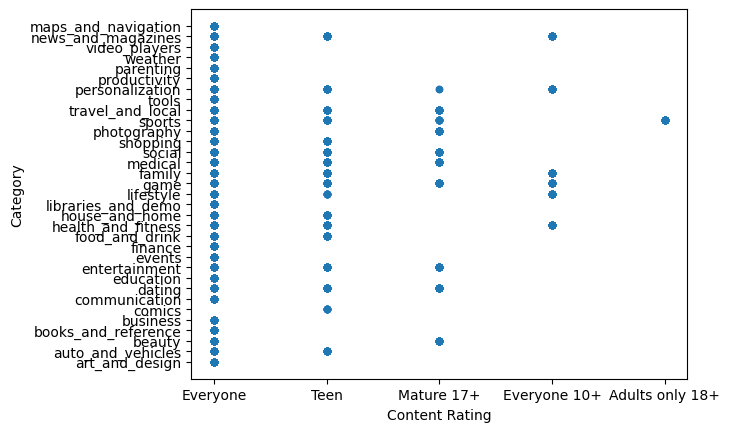

In [45]:
#afficher les colonnes App et Category en nuage de points
combined_data.plot.scatter(x='Content Rating', y='Category')
plt.show()

<Axes: ylabel='count'>

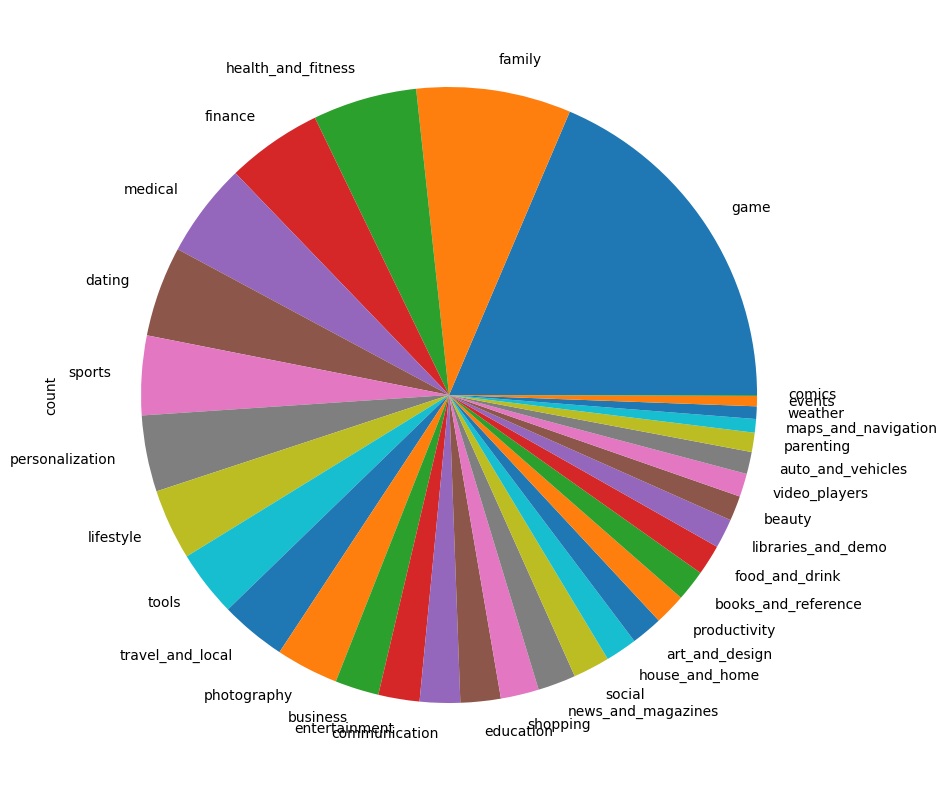

In [46]:
plt.figure(figsize=(10,10))
combined_data["Category"].value_counts().plot.pie()

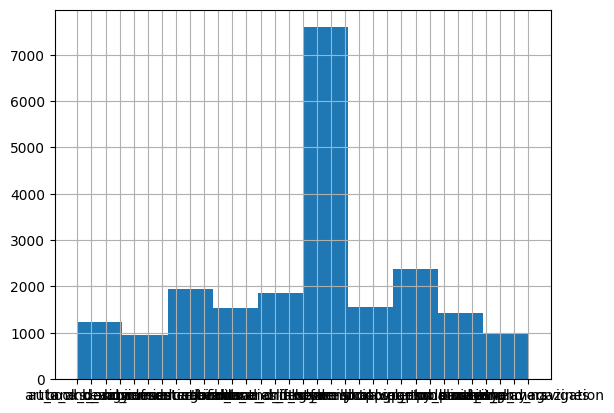

In [49]:
#histogram
combined_data['Category'].hist()
plt.show()

In [50]:
#correlation matrix
corr = combined_data.corr()
corr

ValueError: could not convert string to float: 'Coloring book moana'

Pour générer la matrice de correlation, il faut numériser les colonnes qui ont pour valeur des strings